# Cell segmentation

In [1]:
import lazyslide as zs

/Users/yzheng/Projects/lazyslide-tutorials/.venv/lib/python3.12/site-packages/dask/dataframe/__init__.py:31: FutureWarning: The legacy Dask DataFrame implementation is deprecated and will be removed in a future version. Set the configuration option `dataframe.query-planning` to `True` or None to enable the new Dask Dataframe implementation and silence this warning.
  warnings.warn(
/Users/yzheng/Projects/lazyslide-tutorials/.venv/lib/python3.12/site-packages/xarray_schema/__init__.py:1: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  from pkg_resources import DistributionNotFound, get_distribution


In [2]:
wsi = zs.datasets.lung_carcinoma(with_data=False)

WSI: /Users/yzheng/.cache/huggingface/hub/datasets--RendeiroLab--LazySlide-data/snapshots/5ac17aaa9bf8caadfba1eda04426549415fd0134/lung_carcinoma.ndpi
Reader: openslide
Dimensions: 15616×16384 (h×w), 8 Pyramids
Pixel physical size: 0.22731405710129116 MPP
SpatialData object
└── Images
      └── 'wsi_thumbnail': DataArray[cyx] (3, 1817, 1906)
with coordinate systems:
    ▸ 'global', with elements:
        wsi_thumbnail (Images)
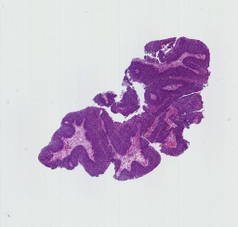

In [3]:
wsi

We are going to use instanseg for cell segmentation. instanseg runs better at mpp=0.5 with tile size of 512

In [4]:
zs.pp.find_tissues(wsi)
zs.pp.tile_tissues(wsi, 512, overlap=0.2, background_fraction=0.95, mpp=0.5)

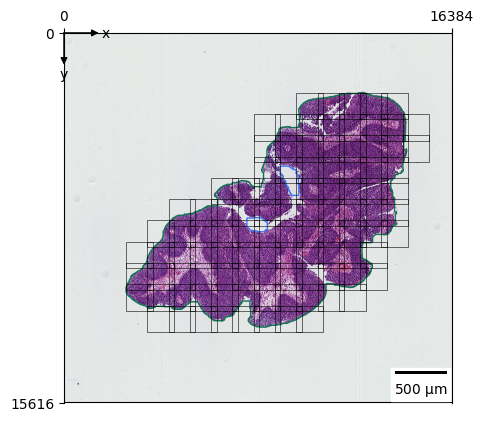

In [5]:
zs.pl.tiles(wsi, linewidth=0.4)

In [6]:
zs.seg.cells(wsi)

Output()

/Users/yzheng/Projects/lazyslide-tutorials/.venv/lib/python3.12/site-packages/torch/nn/modules/module.py:1762: 
UserWarning: Sparse CSR tensor support is in beta state. If you miss a functionality in the sparse tensor support, 
please submit a feature request to https://github.com/pytorch/pytorch/issues. (Triggered internally at 
/Users/runner/work/pytorch/pytorch/pytorch/aten/src/ATen/SparseCsrTensorImpl.cpp:55.)
  return forward_call(*args, **kwargs)

<Axes: >

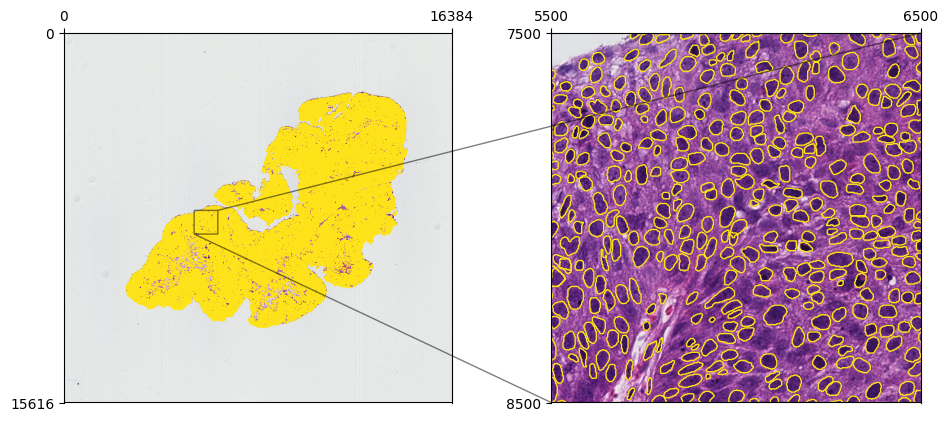

In [8]:
v = zs.pl.WSIViewer(wsi)
v.add_image()
v.add_polygons("cells", linewidth=1, fill=False)
v.add_zoom(5500, 6500, 7500, 8500)
v.show()

In [6]:
zs.seg.cell_types(wsi)

Output()

In [7]:
v = zs.pl.WSIViewer(wsi)
v.add_image()
v.add_polygons("cell_types", color_by="class")

<Axes: >

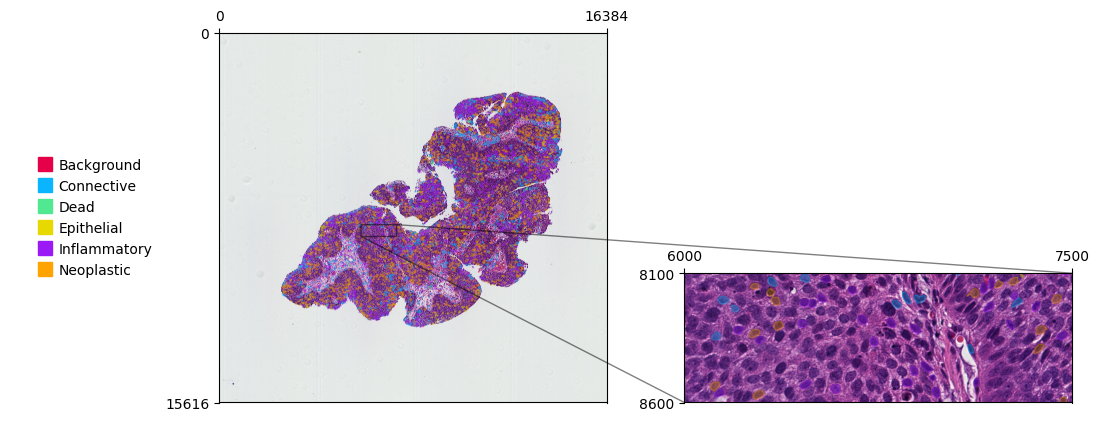

In [8]:
v.add_zoom(6000, 7500, 8100, 8600, cache=False)
v.show()